In [6]:
# ---- IMPORTS ---- #
import numpy as np
import matplotlib.pyplot as plt
# ----------------- #
def science_plot(fontsize = 9):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot()

Processing p = 0.2
Processing p = 0.3
Processing p = 0.4
Processing p = 0.5
Processing p = 0.6
Processing p = 0.7
Processing p = 0.8
Now graphing ...


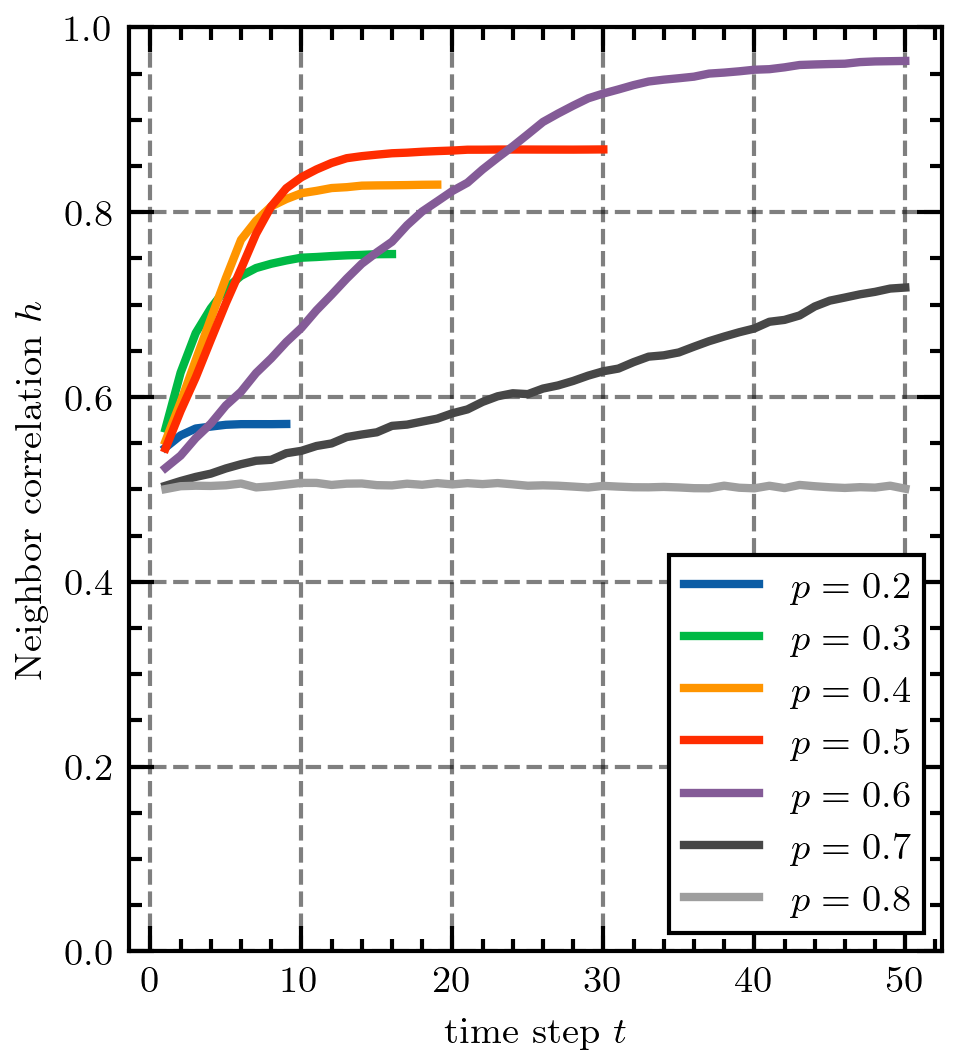

In [ ]:
## Schelling Model ##

# Initialize grid
def init_grid(size, empty_ratio, group_ratio):
    num_cells = size * size
    num_empty = int(empty_ratio * num_cells)
    num_G1 = int(group_ratio * (num_cells - num_empty))
    num_G2 = (num_cells - num_empty) - num_G1
    agent_ID = [-1, 1]
    agents = [agent_ID[0]] * num_G1 + [agent_ID[1]] * num_G2 + [0] * num_empty
    np.random.shuffle(agents)
    return np.array(agents).reshape(size, size)

# Function to get neighbors (Moore)
def get_neighbors(grid, x, y):
    size = len(grid)
    neighbors = []
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0:
                continue
            nx, ny = x + dx, y + dy
            if 0 <= nx < size and 0 <= ny < size:
                neighbors.append(grid[nx, ny])
    return np.array(neighbors)

# Plotter function
def plot_grid(grid, iteration, p):
    plt.figure(figsize=(6, 6))
    plt.grid()
    plt.imshow(grid, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Iteration {iteration}, p = {p}')
    plt.show()

# Determine if agent is unhappy
def is_unhappy(grid, x, y, p):
    agent = grid[x, y]
    if agent == 0:
        return False
    neighbors = get_neighbors(grid, x, y)
    same_type = np.sum(neighbors == agent)
    total_neighbors = np.sum(neighbors != 0)
    
    return total_neighbors > 0 and (same_type / total_neighbors) < p

# Moves unhappy agent to unoccupied cells
def move_unhappy(grid, p):
    size = len(grid)
    new_grid = grid.copy()
    
    # Identify empty cells
    empty_cells = list(zip(*np.where(grid == 0)))  
    np.random.shuffle(empty_cells)  
    
    # Identify unhappy agents
    unhappy_cells = []
    for x in range(size):
        for y in range(size):
            if is_unhappy(grid, x, y, p):
                unhappy_cells.append((x, y))
    
    # Move unhappy agents
    for x, y in unhappy_cells:
        if empty_cells:
            new_x, new_y = empty_cells.pop()
            new_grid[new_x, new_y] = grid[x, y]
            new_grid[x, y] = 0  # Vacate the old position
    
    return new_grid  # No parentheses

def run_schelling(size=10, empty_ratio=0.1, group_ratio=0.5, p=0.5, max_iter=50):
    grid = init_grid(size, empty_ratio, group_ratio)
    #plot_grid(grid, iteration=0, p=p)

    t_vals = []
    segration_val = []

    for i in range(1, max_iter + 1):
        new_grid = move_unhappy(grid, p)
        if np.array_equal(grid, new_grid): 
            break
        grid = new_grid
        # plot_grid(grid, iteration=i)
        happiness_value = neighbor_segregation(grid)
        t_vals.append(i)
        segration_val.append(happiness_value)
    
    #plot_segragation_graph(t_vals, segration_val)
    return grid, t_vals, segration_val

def plot_segragation_graph(t_vals, hap_vals):
    t = np.array(t_vals) 
    s = np.array(hap_vals)

    plt.plot(t,s, color = 'r')
    plt.xlabel('time step $t$')
    plt.ylim(0,1)
    plt.ylabel('Neigbor correlation $h$')
    plt.show()

def neighbor_segregation(grid):
    # Average happiness of the entire grid
    size = len(grid)
    happiness = []
    def happiness_value(grid, x, y):
        agent = grid[x, y]
        if agent == 0:
            return None
        neighbors = get_neighbors(grid, x, y)
        same_type = np.sum(neighbors == agent)
        total_neighbors = np.sum(neighbors != 0)
        return same_type / total_neighbors if total_neighbors > 0 else 0
    
    for x in range(size):
        for y in range(size):
            happiness_val = happiness_value(grid, x, y)
            if happiness_val is not None:
                happiness.append(happiness_val)
    average_happiness = np.mean(happiness)
    return average_happiness

# Run the simulation
# final_grid, t_vals, h_vals  = run_schelling()
# print('Simulation done')
plt.figure(figsize = (3.5,4), dpi = 300)
p_vals = [0.2,0.3,0.4,0.5,0.6,0.7, 0.8]
for p in p_vals:
    print(f'Processing p = {p}')
    grid, t_vals, h_vals  = run_schelling(size = 100, p = p)
    plt.plot(t_vals, h_vals, label = f'$p = {p}$')
print('Now graphing ...')
plt.xlabel('time step $t$')
plt.ylim(0,1)
plt.ylabel('Neighbor correlation $h$')
plt.legend(loc = 'lower right')
plt.show()